# Lab 3: Maximum Likelihood Estimation

In this Lab, Maximum Likelihood Estimation (MLE) is used to estimate the parameters of a linear regression model, by converting the regression model to a conditional probability problem. MLE uses a likelihood function to compute the probability of observing data under the model parameters (see lec5 slides). 

Likelihood function : $𝐿(𝜃|𝑋)$, where $𝜃$ represents the parameters of the likelihood function including the weights of the linear regression (prediction) model and the residual error variance:

$𝐿(𝜃|𝑋)= \prod_{i=1}^{n} \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_i - g(x_i))^2}{2\sigma^2} \right) \right] $
 

To compute Negative of the Log of Likelihood (NLL), given that $\log(a.b) = \log a + \log b$:

$-\log𝐿(𝜃|𝑋)= -\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right]$

Let's now say we change the weights of our model multiple times, and each time we change the weights, a new NLL is obtained given the weights of the model. To find the optimal weights that corresponds to the minimum NLL, we take the gradient of the NLL function with respect to the parameters of the model and set to 0:

$\frac{\partial \mathcal({-logL}(\theta | X))}{\partial \theta} = 0$

$\frac{\partial \mathcal(-\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right])}{\partial \theta} = 0$

$\frac{\partial \mathcal(-\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right])}{\partial \theta} = 
   \frac{\partial \mathcal ( 0.5\sum_{i=1}^{n} [\log (2\pi\sigma^2) + \frac{{(y_i - wx_i)^2}}{{\sigma^2}}] )} {\partial \theta} = 0$

### Generating synthetic data and plotting

In the following cell, you are given the code to generate synthetic data (consider this as your training dataset). The histogram plots provide insights about the distribution of data. 


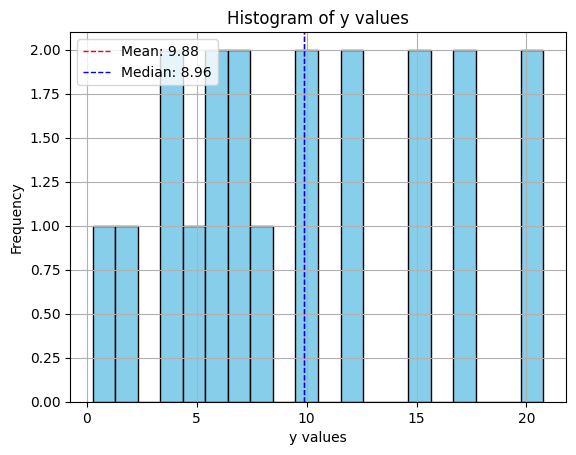

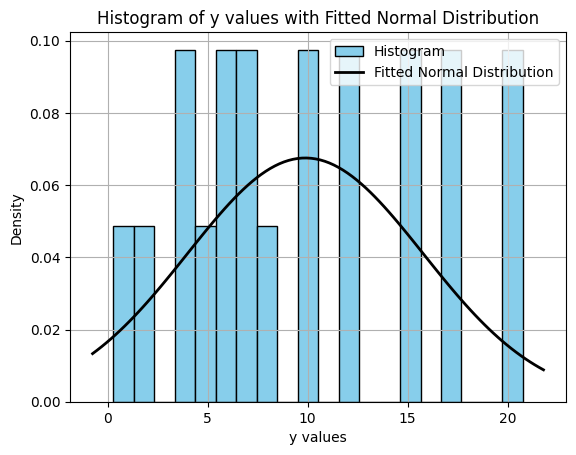

In [20]:
# Step 1: Generating Synthetic Data and visualizing the probability distribution of data

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)  # Set seed for reproducibility
num_samples = 20
X = np.random.uniform(0, 10, num_samples)  # Generate random X values
true_slope = 2
true_intercept = 1
noise = np.random.normal(0, 1, num_samples)  # Add random noise
y = true_slope * X + true_intercept + noise  # Generate y values with linear relationship


# Plot histogram of y values
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('y values')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
# Calculate and plot the mean of y
mean_y = np.mean(y)
median_y = np.median(y)
plt.axvline(mean_y, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_y:.2f}')
plt.axvline(mean_y, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_y:.2f}')
plt.legend()
plt.grid(True)
plt.show()



# Plot histogram of y values
plt.hist(y, bins=20, color='skyblue', edgecolor='black', density=True, label='Histogram')
plt.xlabel('y values')
plt.ylabel('Density')
plt.title('Histogram of y values with Fitted Normal Distribution')

# Fit a normal distribution to the data
mu, std_dev = norm.fit(y)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.legend()
plt.grid(True)
plt.show()



## TODO Tasks: 

##### 1. Finish implementing the `negative_log_likelihood` function in cell labeled 'Step 2'; it should return the Negative Log Likelihood (NLL) values corresponding to the provided weights in the cell labeled 'Step 3'. 

##### 2. With code comments, or in a separate cell, explain each term in your NLL calculation. For example, `y_pred` will be used in the equation, so I would explain `y_pred` as follows: 

```
y_pred = np.dot(X, weights)
Here, np.dot(X, weights) performs the matrix multiplication (multiplying corresponding elements of rows and columns in the matrices and summing the results to produce a new matrix) between the input features X and the weight vector weights. This gives us the predicted values y_pred as a numpy array of shape (20,).
```

##### 3. Report the best model based on NLL. Additionally, ensure that the NLL values for each "change" is printed out in the python notebook that you submit. By default, the final cell will print out the NLL and weights, so just ensure that you do not clear the cell output

**Grading will be greatly dependent on the throughness of your explanation of the NLL equation and the terms involved. The above explanation of `y_pred` is an example of what is sufficient**

**YOU MUST CALCULATE NLL ON YOUR OWN, explicitly. You cannot import a library or use a function that calculates NLL for you - you may use numpy and standard numpy functions like var,log,sum,mean,...**


#### Step 2

In [ ]:
# Step 2: Implementing Negative Log-Likelihood Function

import numpy as np

def negative_log_likelihood(X, y, weights):
    """
    Compute the negative log-likelihood of the data given the weights of the linear regression model.

    Parameters:
        X (ndarray): Independent variable (features) matrix with shape (num_samples, num_features).
        y (ndarray): Dependent variable (response) vector with shape (num_samples,).
        weights (ndarray): Coefficients (including intercept) of the linear regression model.

    Returns:
        float: Negative log-likelihood value.
    """
    # Calculate predicted y values
    # performs the linear combination of weights and input attributes X to obtain the predictions
    # This is performed on training data
    y_pred = np.dot(X, weights)
    #y_pred the variavle is equal to the matrix multiplication between the variables X and weights. 

        
   # Step 2: Compute the residuals (errors between actual and predicted values)
    # residuals = y - y_pred calculates the difference between the actual labels (y) and
    # the predicted labels (y_pred). This represents how far off the model’s predictions are.
     
    difference = y - y_pred

    # Compute NLL using squared error
    # Step 3: Compute the Negative Log-Likelihood (NLL)
    # Assuming normally distributed errors with constant variance, the log-likelihood of the data
    # (ignoring constant terms involving variance and normalization factors) can be computed using:
    # NLL = 0.5 * sum((y - y_pred)^2)
    # This penalizes larger errors more heavily due to the squared term.

    """We calc nll this way by takig half of the sum of the squared errors because we assume a normal distribution derived from the original Gaussian equation. """
    nll = 0.5 * np.sum(difference ** 2) # TODO: Implement the negative log-likelihood calculation
    

    return nll

TODO: Detailed explanation of the NLL equation

#### Step 3

In [22]:
# Step 3: Obtaining the model with the minimum log likelihood
import numpy as np

# Add bias term (column of 1 values (x0)) to X 
X_with_bias = np.column_stack((np.ones_like(X), X))

# Initialize weights 
np.random.seed(42)  # Set seed for reproducibility
initial_weights = np.random.randn(X_with_bias.shape[1])

print("nll:{}, weights:{}".format(negative_log_likelihood(X_with_bias, y, initial_weights),initial_weights ))

# Define the number of times to change the weights
num_changes = 5

for i in range(num_changes):
    # Generate new random weights
    new_weights = np.random.randn(X_with_bias.shape[1])
    # Compute the negative log-likelihood for the new weights
    print("nll:{}, weights:{}".format(negative_log_likelihood(X_with_bias, y, new_weights),new_weights))

nll:1402.811927356277, weights:[ 0.49671415 -0.1382643 ]
nll:75.21691305908067, weights:[0.64768854 1.52302986]
nll:1687.6457414585059, weights:[-0.23415337 -0.23413696]
nll:362.5654339849089, weights:[1.57921282 0.76743473]
nll:804.4513223133262, weights:[-0.46947439  0.54256004]
nll:2088.4713891041306, weights:[-0.46341769 -0.46572975]


TODO: Report the best model based on NLL

The bets model based on the NLL would be the second outputtte as the value of the NLL is smallest 